<font size=6><b>Estimator API Tensorflow </b></font>

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Structure Data Creation

In [2]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

Addition of Noise of Y variable of Structure Data

In [4]:

b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [5]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [6]:
my_data.head()

,X Data,Y
0,0.00000,4.754532
1,0.00001,4.662350
2,0.00002,6.118791
3,0.00003,5.714646
4,0.00004,6.037831


Visulization

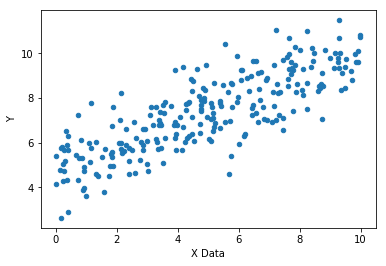

In [7]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

## tf.estimator API



In [9]:
import tensorflow as tf

In [10]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [11]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd4fbec5bd0>, '_model_dir': '/tmp/tmp9QDr5i', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


### Train Test Split

We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [14]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [15]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [16]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [17]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

### Train the Estimator

In [18]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp9QDr5i/model.ckpt.
INFO:tensorflow:loss = 243.11948, step = 0
INFO:tensorflow:global_step/sec: 1483.37
INFO:tensorflow:loss = 9.805662, step = 100 (0.069 sec)
INFO:tensorflow:global_step/sec: 1541.5
INFO:tensorflow:loss = 17.068848, step = 200 (0.065 sec)
INFO:tensorflow:global_step/sec: 1601.05
INFO:tensorflow:loss = 6.240451, step = 300 (0.063 sec)
INFO:tensorflow:global_step/sec: 1626.89
INFO:tensorflow:loss = 15.569762, step = 400 (0.061 sec)
INFO:tens

### Evaluation

In [ ]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

In [ ]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

In [ ]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

### Predictions

In [ ]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [ ]:
list(estimator.predict(input_fn=input_fn_predict))

In [ ]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

In [ ]:
predictions

In [ ]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')